# Final Project

# Nobel Prize Winners: 1900-2020

# Group Number: 57

### Presented by: Eden Zarka & Shirel Elmaleh
 

<a id='section1'></a>

<h1 style="background-color: #FFFFFF; color: #0046d6; border-radius: 10px; text-align: center; padding-top: 10px; padding-bottom: 10px; font-family: 'Arial';">
    <img src="https://github.com/Shirelmaleh/new_project/raw/main/photo%20prix%20nobel.jpg" width="70%" height="20%" alt="Centered Image" />
</h1>

<br>Source:  [Kaggle](https://www.kaggle.com/datasets/rishidamarla/nobel-prize-winners-19002020)


<b id="Top"> </b>  

1. [Analyse by Gender](#1)
2. [The place of women over time](#2)
3. [Analyse by Age ](#3)
4. [Motivation](#4)
5. [Conclusion](#5)


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import plotly.express as px #just for the map

In [2]:
url = "https://github.com/Shirelmaleh/new_project/raw/main/nobel_prize_by_winner.csv"

try:
    nobel_df = pd.read_csv(url)
except pd.errors.ParserError:
    print("Error reading CSV file. Trying alternative method...")

In [3]:
nobel_df.head()

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,diedCity,gender,year,category,overallMotivation,share,motivation,name,city,country
0,846,Elinor,Ostrom,8/7/1933,6/12/2012,USA,US,"Los Angeles, CA",USA,US,"Bloomington, IN",female,2009.0,economics,NaN,2.0,"""for her analysis of economic governance, espe...",Indiana University,"Bloomington, IN",USA
1,846,Elinor,Ostrom,8/7/1933,6/12/2012,USA,US,"Los Angeles, CA",USA,US,"Bloomington, IN",female,2009.0,economics,NaN,2.0,"""for her analysis of economic governance, espe...",Arizona State University,"Tempe, AZ",USA
2,783,Wangari Muta,Maathai,4/1/1940,9/25/2011,Kenya,KE,Nyeri,Kenya,KE,Nairobi,female,2004.0,peace,NaN,1.0,"""for her contribution to sustainable developme...",NaN,NaN,NaN
3,230,Dorothy Crowfoot,Hodgkin,5/12/1910,7/29/1994,Egypt,EG,Cairo,United Kingdom,GB,Shipston-on-Stour,female,1964.0,chemistry,NaN,1.0,"""for her determinations by X-ray techniques of...","University of Oxford, Royal Society",Oxford,United Kingdom
4,918,Youyou,Tu,12/30/1930,0000-00-00,China,CN,Zhejiang Ningbo,NaN,NaN,NaN,female,2015.0,medicine,NaN,2.0,"""for her discoveries concerning a novel therap...",China Academy of Traditional Chinese Medicine,Beijing,China


In [4]:
nobel_df.shape

(972, 20)

In [5]:
nobel_df.isnull().sum()

id                     0
firstname              6
surname               36
born                  26
died                  26
bornCountry           32
bornCountryCode       32
bornCity              34
diedCountry          371
diedCountryCode      372
diedCity             377
gender                 0
year                   6
category               6
overallMotivation    956
share                  6
motivation            94
name                 252
city                 258
country              258
dtype: int64

In [6]:
type(nobel_df)

pandas.core.frame.DataFrame

In [7]:
len(nobel_df)

972

In [8]:
nobel_df.columns

Index(['id', 'firstname', 'surname', 'born', 'died', 'bornCountry',
       'bornCountryCode', 'bornCity', 'diedCountry', 'diedCountryCode',
       'diedCity', 'gender', 'year', 'category', 'overallMotivation', 'share',
       'motivation', 'name', 'city', 'country'],
      dtype='object')

# Analyse by gender 

##  1.1 Men VS Woman 

In [9]:
nobel_df['gender'].unique()

array(['female', 'male', 'org'], dtype=object)

In [10]:
filter_gender=nobel_df.loc[(nobel_df['gender']=="male")|(nobel_df['gender']=="female")]

Text(0.5, 1.0, 'Number of Nobel Prize winners by gender')

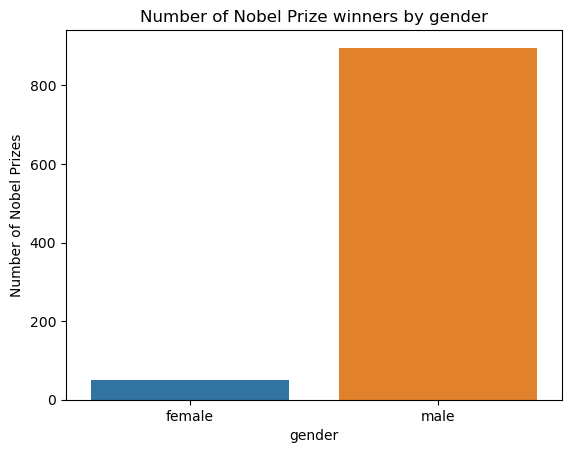

In [11]:
countplot = sns.countplot(data=filter_gender, x='gender')
countplot.set_ylabel('Number of Nobel Prizes')
countplot.set_title('Number of Nobel Prize winners by gender')

## 1.2 The link between Category & Man/Woman

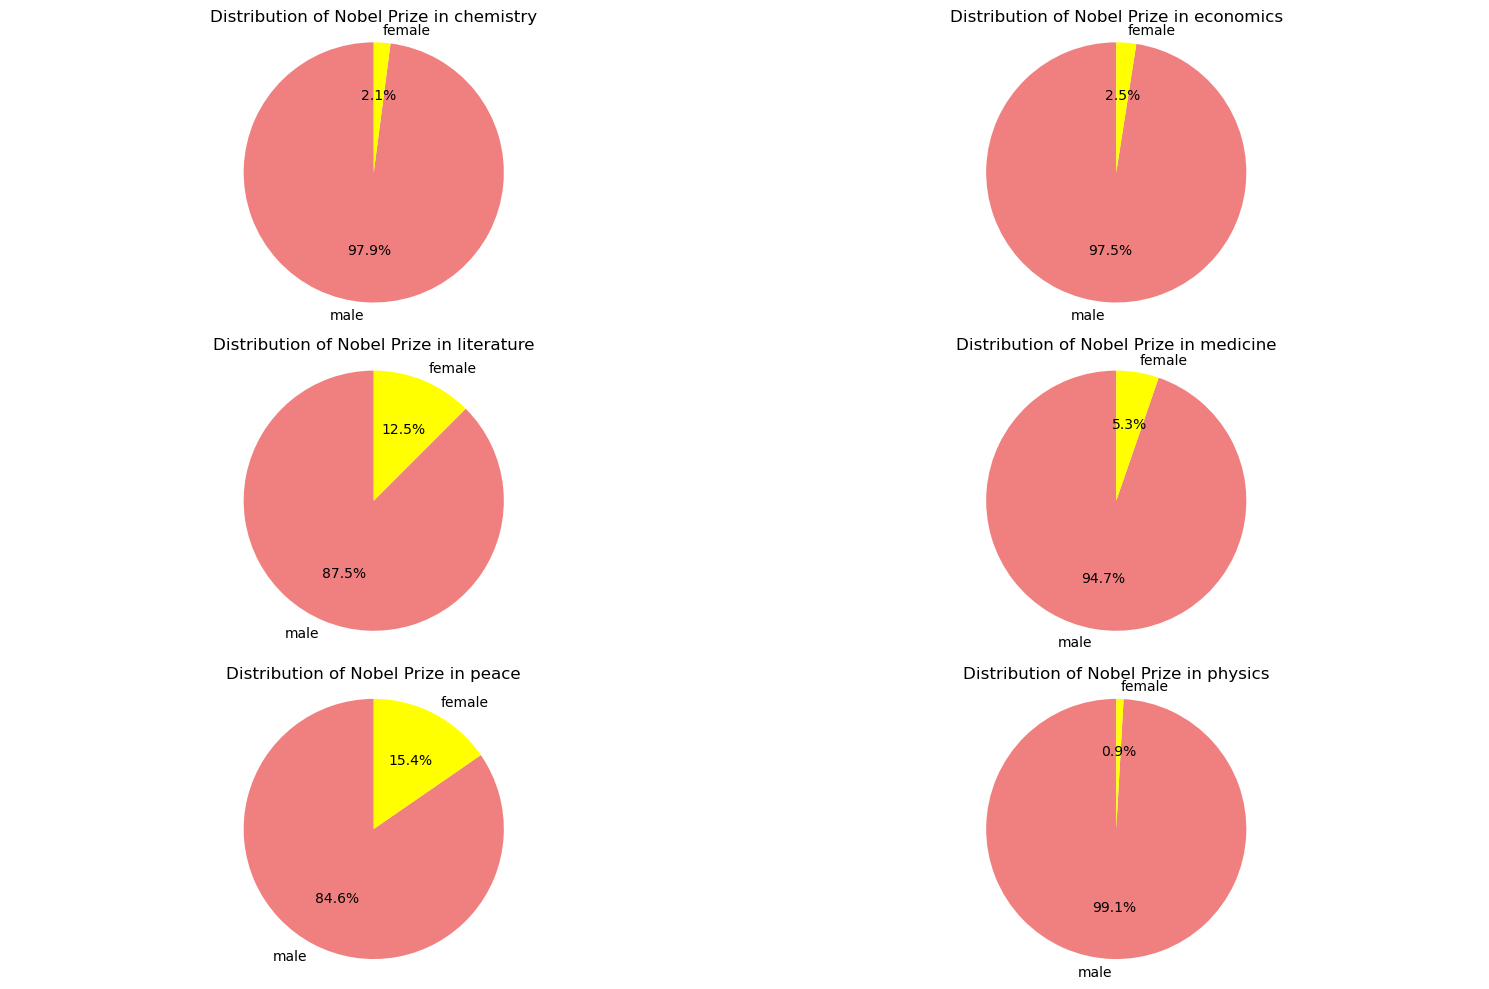

In [12]:
nobel_counts = nobel_df.groupby(['category', 'gender']).size().unstack()
categories = nobel_counts.index
num_categories = len(categories)
num_cols = 2  
num_rows = (num_categories + num_cols - 1) // num_cols  
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 10))
if num_rows == 1:
    axs = axs.reshape(1, -1)
for i, category in enumerate(categories):
    row = i // num_cols
    col = i % num_cols
    ax = axs[row, col]
    category_data = pd.Series([nobel_counts.loc[category, 'male'], nobel_counts.loc[category, 'female']], index=['male', 'female'])
    ax.pie(category_data, labels=category_data.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'yellow'])
    ax.set_title(f'Distribution of Nobel Prize in {category}')
    ax.axis('equal')
for i in range(len(categories), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    axs[row, col].axis('off')

plt.tight_layout()
plt.show()

In [13]:
filter_org = nobel_df[nobel_df["gender"] == "org"]
filter_org["category"].unique()

array(['peace'], dtype=object)

## 1.3  Evolution of Nobel Prize Reception Over the Years

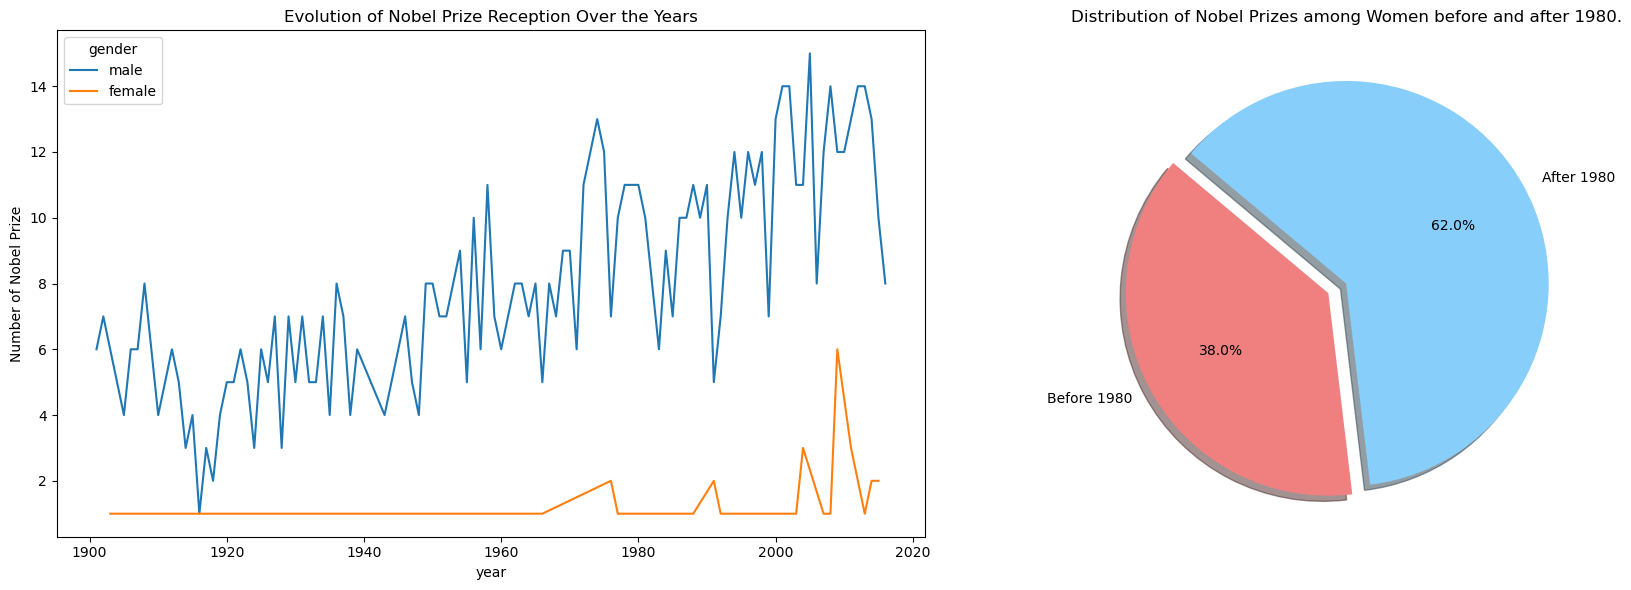

In [14]:
nobel_counts = filter_gender.groupby(['year', 'gender']).size().reset_index(name='count')
plt.figure(figsize=(18, 6))  
plt.subplot(1, 2, 1)  
sns.lineplot(data=nobel_counts, x='year', y='count', hue='gender')
plt.ylabel('Number of Nobel Prize')
plt.title("Evolution of Nobel Prize Reception Over the Years")


plt.subplot(1, 2, 2)
female = nobel_df[nobel_df['gender'] == 'female']
before1980 = len(nobel_df[(nobel_df['gender'] == 'female') & (nobel_df["year"] <= 1980)])
after1980 = len(nobel_df[(nobel_df['gender'] == 'female') & (nobel_df["year"] >= 1980)])
labels = ['Before 1980', 'After 1980']
sizes = [before1980, after1980]
colors = ['lightcoral', 'lightskyblue']
plt.pie(sizes, explode=(0.1,0), labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Distribution of Nobel Prizes among Women before and after 1980.")

plt.tight_layout() 
plt.show()



# Conclusion

1.1 The histogram shows that men are more prominent than women.    

1.2 The pie chart shows that women excel in the fields of peace and literature. These are the only fields in which they have any chance of imposing themselves.Let's not forget the organizations whose sole domain is peace.    

1.3  We can see that during World War I, rewards for men decreased significantly.  
Over time, women have gained influence, likely due to changes in their social roles and advancements in women's rights. The pie chart shows that more women received Nobel Prizes after 1980, despite more years passing before that period, indicating a gradual shift towards prominence for women after 1980.

Which countries have contributed to advancing women's rights?

#  The place of women over time

## 2.1Analyse by Country

In [15]:
#We check the data associated with the countries to make sure that all the data is correct.
all_country= nobel_df["country"].unique()
nobel_df[['country']].describe()
count_country= nobel_df[["country"]].value_counts()

In [16]:
df_countries['log_count'] = np.log(df_countries['count'] + 1)
fig = px.choropleth(df_countries,
                    locations='country',
                    locationmode='country names',
                    color='log_count',
                    hover_name='country',
                    color_continuous_scale='Picnic',
                    title='Nobel Prize winners by country',
                    range_color=(df_countries['log_count'].min(), df_countries['log_count'].max()))

fig.show(renderer="svg", include_plotlyjs=False)

NameError: name 'df_countries' is not defined

## 2.2 Distribution Prize of Women by Country

In [ ]:
nobel_df.loc[nobel_df['country'].isin(['Germany', 'Federal Republic of Germany']), 'country'] = 'Germany'
nobel_df.loc[nobel_df['country'].isin(['France', 'Alsace']), 'country'] = 'France'
count_country = nobel_df['country'].value_counts()

In [ ]:
filtered_df = nobel_df[(nobel_df['gender'] == 'female')]
sns.barplot(data=filtered_df, y=count_country.index,x=count_country.values)
plt.ylabel('Country')
plt.title('Number of Nobel Prizes awarded to women by category')
plt.show()

# Conclusion 

2.1 When analyzing which countries have won the most Nobel Prizes, we can conclude from the map that the United States, the United Kingdom, Germany, and France are the most powerful countries, and thus the countries that have won the most awards overall.    

2.2 We observe that very few countries have rewarded women. The five most powerful countries shown above on the map are also the top five countries that have played a role in the evolution of women's recognition thanks to their place in the world and their development thanks to their place in the world and their development.Moreover, despite its small size, Israel occupies a noteworthy place in the evolution of Nobel prizes awarded to women. When compared to larger and more powerful countries like Russia or even China, Israel continues to stand out.

Now let's examine the age groups to which the awards are distributed.

# Analyse by Age 

## 3.1 Age & Decade

In [ ]:
nobel_df[["born"]].dtypes
nobel_df['born'] = pd.to_datetime(nobel_df['born'], format='%d/%m/%Y', errors='coerce')
nobel_df[['born']].dtypes
nobel_df["bornyear"] = pd.DatetimeIndex(nobel_df['born']).year

In [ ]:
nobel_df['year'] = pd.to_numeric(nobel_df['year'], errors='coerce')
nobel_df['bornyear'] = pd.to_numeric(nobel_df['bornyear'], errors='coerce')
nobel_df["category"].unique()
nobel_df['age'] = (nobel_df['year'] - nobel_df['bornyear'])

In [ ]:
nobel_df_year_age = nobel_df[nobel_df['year'].notna() & nobel_df['age'].notna()]

In [ ]:
g =sns.lmplot(x='year', y='age', data=nobel_df_year_age , lowess=True, aspect=2, line_kws={'color': 'black'})
g.fig.suptitle('Age of Nobel Prize Winners over Time', fontsize=16, y=1.02)

## 3.2  Average age

In [ ]:
sns.boxplot(x='category', y='age', data=nobel_df)

## 3.3 Analyse Year & Age  by Category

In [ ]:
g = sns.lmplot(x='year', y='age', data=nobel_df_year_age, lowess=True, aspect=2, line_kws={'color': 'black'}, col="category", col_wrap=2, height=4, sharex=True)
g.fig.suptitle('Relationship between Year and Age by Nobel Prize Category',fontsize=16, y=1.02) 

# Conclusion
3.1 Over the years, there have been more Nobel Prize winners, but the average age has stayed the same despite technological advances. One exception was noted in 2018 when someone under 20 won a Nobel Prize.

3.2 We check where this exception occurred, which is related to the peace category. This is where there is the most variation in ages of winners.

3.3 So, we analyze by categories. The exceptions are as follows: winners in the economics category began only after the year 1969. Regarding the peace category, the average age varies widely.

# Motivation

In [ ]:
text = ' '.join(nobel_df['motivation'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Conclusion

Most of the participants were motivated by the desire to discover and develop new ideas. 

# General conclusion 

We studied gender differences using this data. Men have received awards more often than women. However, there has been a growing number of female winners over time. It's interesting to note that the most developed countries also have the highest number of female recipients.

The average age of winners has stayed fairly consistent, with older individuals typically receiving awards. There have been a few exceptions noted. Exploring why winners are motivated remains a vital and varied area of research.

Moving forward, examining the motivations of outstanding winners based on age and gender could offer valuable insights into how criteria for academic and scientific recognition are evolving.